## Make and train SCVI model

In [1]:
import anndata
import scanpy as sc
import scvi

Global seed set to 0


In [4]:
scvi.model

<module 'scvi.model' from '/home/benisam/miniconda3/envs/scvi-tools-env/lib/python3.9/site-packages/scvi/model/__init__.py'>

In [5]:
# read in of beforehand generated data
adata = anndata.read_h5ad('/mnt/c/Users/saman/00_Bachelorarbeit/Bachelor/data/output/adata_raw.h5ad') # TODO path of data
adata

AnnData object with n_obs × n_vars = 7641 × 10962
    obs: 'sampleID', 'barcode', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier'
    uns: 'sampleID_colors'

In [6]:
# setup
scvi.model.SCVI.setup_anndata(adata, batch_key='sampleID')
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood='nb')
vae

SCVI Model with the following params: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal
Training status: Not Trained
Model's adata is minified?: False

In [7]:
# training of scvi model
vae.train()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█████████████████████████████████████████| 400/400 [1:01:18<00:00,  8.70s/it, loss=6.8e+03, v_num=1]

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█████████████████████████████████████████| 400/400 [1:01:18<00:00,  9.20s/it, loss=6.8e+03, v_num=1]


In [9]:
vae.save(dir_path='/mnt/c/Users/saman/00_Bachelorarbeit/Bachelor/output/scvi_models/')

In [10]:
vae.get_latent_representation()

array([[-1.2528924e+00,  3.7407154e-01, -3.5531068e-01, ...,
         5.7316482e-02, -5.5720294e-01, -2.6531920e-02],
       [-5.3329170e-01,  9.3791145e-01, -8.8116503e-01, ...,
        -9.2241168e-02, -2.5355105e+00, -1.9874897e-02],
       [-2.9377058e-01, -1.4062407e+00, -1.3190808e+00, ...,
        -7.3372424e-02, -1.7849177e-01,  1.2367379e-03],
       ...,
       [-1.4380635e+00,  9.4295985e-01, -7.7795303e-01, ...,
        -3.8429499e-02, -4.5002759e-01,  4.7543883e-02],
       [ 5.1719785e-02, -1.0750977e+00,  5.2841496e-01, ...,
         1.1005092e-01,  4.4114172e-02, -8.9341961e-03],
       [-1.0592456e+00, -1.8581811e-01, -1.1433243e+00, ...,
         5.6191266e-02,  1.0586948e+00,  7.0873289e-03]], dtype=float32)

In [11]:
# save results in adata
adata.obsm['X_scVI'] = vae.get_latent_representation()

In [12]:
# clustering of the results
sc.pp.neighbors(adata, use_rep="X_scVI")

In [13]:
sc.tl.umap(adata)

In [14]:
import seaborn as sns
sns.set_theme("notebook", font_scale=0.8)

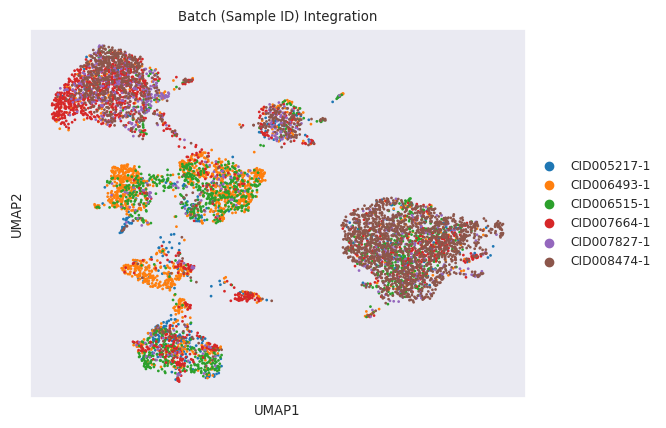

In [15]:
sc.pl.umap(adata, color="sampleID", title="Batch (Sample ID) Integration")

In [16]:
# adata.write_h5ad("/mnt/c/Users/saman/00_Bachelorarbeit/Bachelor/data/output/adata_integrated.h5ad")

In [ ]:
# TODO use this!!! do total counts norm after (make adata with four different layers)
# .get_latent_representation()

In [17]:
norms = vae.get_normalized_expression()
norms

index,AL669831.5,NOC2L,AL645608.7,HES4,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,SDF4,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
CID005217-1-AAAGGTAAGAGTCAGC,0.000017,0.000065,5.876128e-06,0.000105,0.000722,2.439715e-06,0.000008,2.201110e-04,1.980178e-04,0.000082,...,0.027940,0.000657,0.022610,0.028209,0.009248,0.001487,0.018284,0.005753,0.000851,0.018065
CID005217-1-AAAGTCCTCGAACGGA,0.000012,0.000119,5.865694e-07,0.000025,0.000356,5.896395e-07,0.000002,2.013530e-05,4.760188e-05,0.000049,...,0.025681,0.000546,0.019778,0.028585,0.008911,0.001371,0.016550,0.005160,0.001305,0.015375
CID005217-1-AACAGGGAGTATTGCC,0.000013,0.000053,8.625745e-06,0.000144,0.000239,1.460493e-05,0.000007,5.616678e-07,3.212670e-06,0.000142,...,0.018660,0.000634,0.019925,0.023273,0.011066,0.002101,0.017411,0.004811,0.000274,0.017469
CID005217-1-AACAGGGGTGAATGAT,0.000003,0.000073,1.821324e-05,0.000198,0.000547,5.153951e-06,0.000006,5.996793e-07,9.954584e-06,0.000166,...,0.015394,0.000377,0.015365,0.015147,0.007932,0.000917,0.010788,0.003472,0.000170,0.013391
CID005217-1-AACCAACGTCATCGCG,0.000022,0.000028,1.714799e-05,0.000193,0.001037,4.788163e-06,0.000014,6.143597e-06,1.402441e-05,0.000045,...,0.010000,0.000154,0.007023,0.010461,0.003313,0.000416,0.006264,0.001569,0.000113,0.005558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CID008474-1-TTTGGTTTCCGAACGC,0.000008,0.000049,1.170835e-05,0.000052,0.000003,1.961287e-05,0.000009,4.355660e-08,1.502348e-07,0.000141,...,0.022776,0.000349,0.017909,0.021915,0.006868,0.000448,0.010027,0.002449,0.000126,0.013183
CID008474-1-TTTGGTTTCTGCGGGT,0.000002,0.000038,9.919897e-06,0.000039,0.000081,3.078964e-05,0.000006,9.610129e-06,6.978455e-05,0.000109,...,0.028933,0.000440,0.029836,0.030095,0.014066,0.000684,0.016336,0.003297,0.000124,0.021657
CID008474-1-TTTGTTGAGTTACTCG,0.000004,0.000058,3.627549e-06,0.000012,0.000002,1.071054e-05,0.000006,2.604720e-08,7.659744e-08,0.000117,...,0.025616,0.000442,0.024515,0.027960,0.007968,0.000461,0.011672,0.003099,0.000211,0.016098
CID008474-1-TTTGTTGCATGAGTAA,0.000001,0.000011,4.327467e-07,0.000004,0.000042,2.614254e-07,0.000001,6.667156e-05,3.100595e-05,0.000038,...,0.004441,0.000047,0.004293,0.003428,0.001733,0.000085,0.001938,0.000543,0.000036,0.003144


In [18]:
adata.layers['integrated'] = norms
adata

AnnData object with n_obs × n_vars = 7641 × 10962
    obs: 'sampleID', 'barcode', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels'
    uns: 'sampleID_colors', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'integrated'
    obsp: 'distances', 'connectivities'

In [19]:
adata.write_h5ad("/mnt/c/Users/saman/00_Bachelorarbeit/Bachelor/data/output/adata_integrated.h5ad")

## Load Trained Model

In [2]:
adata = anndata.read_h5ad("/mnt/c/Users/saman/gobi/gobi_sampleQC_batchQuant/data/adata_integrated_protocol.h5ad")
adata

AnnData object with n_obs × n_vars = 120901 × 9848
    obs: 'sampID', 'PatientID', 'AnatomicLocation', 'PoolID', 'Protocol', 'CellsLoaded', 'FreezeProtocol', 'AnatomicLocation_Relation', 'AgeYM', 'Sex', 'Inflammation', 'sample_LMU_info_Timepoint', 'celltype', 'sequence', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels'
    uns: 'Protocol_colors', '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    obsp: 'connectivities', 'distances'

In [3]:
tester = scvi.model.SCVI.load('/mnt/c/Users/saman/gobi/gobi_sampleQC_batchQuant/output/scvi_models/', adata)
tester

INFO     File /mnt/c/Users/saman/gobi/gobi_sampleQC_batchQuant/output/scvi_models/model.pt already downloaded      


SCVI Model with the following params: 
n_hidden: 128, n_latent: 30, n_layers: 2, dropout_rate: 0.1, dispersion: gene, gene_likelihood: nb, 
latent_distribution: normal
Training status: Trained
Model's adata is minified?: False

In [4]:
norms = tester.get_normalized_expression()
norms

,AL669831.5,LINC00115,NOC2L,AL645608.7,HES4,ISG15,AGRN,C1orf159,TNFRSF18,TNFRSF4,...,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
CID005424-1:AAACCCATCGGTCGAC,0.000007,0.000005,0.000030,0.000160,0.000507,0.000181,0.000016,0.000006,1.915211e-06,0.000004,...,0.020163,0.000654,0.026502,0.028712,0.017233,0.001327,0.017222,0.003324,0.000147,0.016528
CID005424-1:AAACGAAGTATACGGG,0.000018,0.000017,0.000040,0.000014,0.000121,0.000187,0.000003,0.000009,8.711252e-05,0.000032,...,0.017718,0.000401,0.021152,0.019969,0.012145,0.000737,0.011285,0.002347,0.000288,0.012661
CID005424-1:AAACGAATCTCCAAGA,0.000010,0.000003,0.000035,0.000013,0.000076,0.000143,0.000003,0.000007,2.614773e-05,0.000010,...,0.009511,0.000337,0.010411,0.008595,0.008593,0.000573,0.007222,0.001691,0.000198,0.006544
CID005424-1:AAACGCTCAACTCGTA,0.000011,0.000005,0.000041,0.000005,0.000047,0.000142,0.000003,0.000005,2.180124e-05,0.000013,...,0.007524,0.000233,0.007431,0.007008,0.005068,0.000494,0.004841,0.001165,0.000166,0.004789
CID005424-1:AAACGCTGTAAGATCA,0.000006,0.000002,0.000043,0.000022,0.000247,0.000254,0.000001,0.000006,4.135365e-04,0.000517,...,0.013287,0.000310,0.015668,0.013947,0.007364,0.000441,0.007088,0.001474,0.000307,0.009252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CID005095-1:TTTGTCAAGAGTTGGC,0.000008,0.000005,0.000049,0.000007,0.000092,0.000362,0.000002,0.000011,3.560252e-04,0.000403,...,0.007120,0.000823,0.002704,0.005270,0.001737,0.002286,0.001670,0.001132,0.000189,0.004462
CID005095-1:TTTGTCAAGTACGCCC,0.000070,0.000088,0.000114,0.000007,0.000029,0.000056,0.000024,0.000044,5.013498e-06,0.000003,...,0.042082,0.006628,0.016184,0.041966,0.012205,0.010476,0.014321,0.007379,0.001666,0.026407
CID005095-1:TTTGTCACAGATCTGT,0.000002,0.000002,0.000078,0.000003,0.000030,0.000014,0.000014,0.000009,4.680051e-07,0.000001,...,0.023865,0.001393,0.006157,0.019150,0.006080,0.004394,0.006467,0.001973,0.000156,0.010838
CID005095-1:TTTGTCATCCTTGGTC,0.000005,0.000003,0.000068,0.000002,0.000015,0.000069,0.000001,0.000006,1.899480e-06,0.000006,...,0.009205,0.001396,0.003177,0.006963,0.002801,0.003386,0.002476,0.001013,0.000378,0.006047


In [5]:
adata.layers['integrated'] = norms
adata

AnnData object with n_obs × n_vars = 120901 × 9848
    obs: 'sampID', 'PatientID', 'AnatomicLocation', 'PoolID', 'Protocol', 'CellsLoaded', 'FreezeProtocol', 'AnatomicLocation_Relation', 'AgeYM', 'Sex', 'Inflammation', 'sample_LMU_info_Timepoint', 'celltype', 'sequence', 'doublet_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', '_scvi_batch', '_scvi_labels'
    uns: 'Protocol_colors', '_scvi_manager_uuid', '_scvi_uuid', 'celltype_colors', 'neighbors', 'umap'
    obsm: 'X_scVI', 'X_umap'
    layers: 'integrated'
    obsp: 'connectivities', 'distances'

In [6]:
adata.write_h5ad("/mnt/c/Users/saman/gobi/gobi_sampleQC_batchQuant/data/adata_integrated_protocol.h5ad")